<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import numpy as np

In [2]:
uploaded = files.upload()

Saving modified_Global_Superstore_2018.xlsx to modified_Global_Superstore_2018.xlsx


In [3]:
# Carga usando el nombre correcto del archivo subido
data = pd.read_excel("modified_Global_Superstore_2018.xlsx")

# Mostrar las primeras filas
data.head()

,Unnamed: 0,Order ID,Order Date,Ship Date,Delivery Time,Ship Mode,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Shipping Category,Order Priority Numeric
0,0,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,0.0,102.42,39.66,Medium,365.91,0.139952,1247.82,195.87,Very High,2
1,1,ID-2015-BD116051-42248,2015-09-01,2015-09-04,3,Second Class,Brian Dahlen,Consumer,Herat,Hirat,...,0.0,104.49,18.72,Medium,27.06,0.429047,447.42,128.85,High,2
2,2,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,0.0,13.77,14.10,Medium,115.44,0.039761,1247.82,195.87,High,2
3,3,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,0.0,79.68,11.01,Medium,42.42,0.469590,1247.82,195.87,High,2
4,4,ID-2015-BD116051-42248,2015-09-01,2015-09-04,3,Second Class,Brian Dahlen,Consumer,Herat,Hirat,...,0.0,24.36,5.72,Medium,50.97,0.119482,447.42,128.85,Medium,2


In [8]:
data.columns

Index(['Index', 'Order ID', 'Order Date', 'Ship Date', 'Delivery Time',
       'Ship Mode', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Product Name', 'Sub-Category', 'Category', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Sales per Quantity', 'Profit Margin', 'Total Sales', 'Total Profit',
       'Shipping Category', 'Order Priority Numeric'],
      dtype='object')

In [7]:
# Renombrar columna Unnamed: 0

data = data.rename(columns={"Unnamed: 0": "Index"})
data.head()


,Index,Order ID,Order Date,Ship Date,Delivery Time,Ship Mode,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Shipping Category,Order Priority Numeric
0,0,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,0.0,102.42,39.66,Medium,365.91,0.139952,1247.82,195.87,Very High,2
1,1,ID-2015-BD116051-42248,2015-09-01,2015-09-04,3,Second Class,Brian Dahlen,Consumer,Herat,Hirat,...,0.0,104.49,18.72,Medium,27.06,0.429047,447.42,128.85,High,2
2,2,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,0.0,13.77,14.10,Medium,115.44,0.039761,1247.82,195.87,High,2
3,3,IN-2017-CA120551-42816,2017-03-22,2017-03-29,7,Standard Class,Cathy Armstrong,Home Office,Herat,Hirat,...,0.0,79.68,11.01,Medium,42.42,0.469590,1247.82,195.87,High,2
4,4,ID-2015-BD116051-42248,2015-09-01,2015-09-04,3,Second Class,Brian Dahlen,Consumer,Herat,Hirat,...,0.0,24.36,5.72,Medium,50.97,0.119482,447.42,128.85,Medium,2


# Medidas de tendencia Central

In [9]:
# Determinar que columnas contienen datos numericos
data.dtypes

Index                              int64
Order ID                          object
Order Date                datetime64[ns]
Ship Date                 datetime64[ns]
Delivery Time                      int64
Ship Mode                         object
Customer Name                     object
Segment                           object
City                              object
State                             object
Country                           object
Region                            object
Product Name                      object
Sub-Category                      object
Category                          object
Sales                            float64
Quantity                           int64
Discount                         float64
Profit                           float64
Shipping Cost                    float64
Order Priority                    object
Sales per Quantity               float64
Profit Margin                    float64
Total Sales                      float64
Total Profit    

In [11]:
# Filtrar columnas numericas
columnas_numericas = data.select_dtypes(include='number').columns
print(columnas_numericas)

Index(['Index', 'Delivery Time', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Sales per Quantity', 'Profit Margin', 'Total Sales',
       'Total Profit', 'Order Priority Numeric'],
      dtype='object')


In [12]:
# # Calcular las medidas para columnas numericas
# for column in columnas_numericas:
#     print(f"\nColumna: {column}")
#     print(f"Media: {data[column].mean()}")
#     print(f"Mediana: {data[column].median()}")
#     print(f"Moda: {data[column].mode().values}")
#     print(f"Varianza: {data[column].var()}")
#     print(f"Desviacion estandar: {data[column].std()}")
#     print(f"Sesgo: {data[column].skew()}")
#     print(f"Cuantiles: {data[column].quantile([0.25, 0.5, 0.75]).to_dict()}")
#     print(f"Rango: {data[column].max() - data[column].min()}")
#     print(f"Curtosis: {data[column].kurt()}")
#     print(f"Suma: {data[column].sum()}")
#     print(f"Minimo: {data[column].min()}")
#     print(f"Maximo: {data[column].max()}")
#     print(f"Conteo: {data[column].count()}")


Columna: Index
Media: 25644.5
Mediana: 25644.5
Moda: [    0     1     2 ... 51287 51288 51289]
Varianza: 219226282.5
Desviacion estandar: 14806.29199023172
Sesgo: 0.0
Cuantiles: {0.25: 12822.25, 0.5: 25644.5, 0.75: 38466.75}
Rango: 51289
Curtosis: -1.1999999999999997
Suma: 1315306405
Minimo: 0
Maximo: 51289
Conteo: 51290

Columna: Delivery Time
Media: 3.970403587443946
Mediana: 4.0
Moda: [4]
Varianza: 2.993723267089237
Desviacion estandar: 1.7302379221047137
Sesgo: -0.43134791800928024
Cuantiles: {0.25: 3.0, 0.5: 4.0, 0.75: 5.0}
Rango: 8
Curtosis: -0.25100149791021975
Suma: 203642
Minimo: 0
Maximo: 8
Conteo: 51290

Columna: Sales
Media: 246.49058120257362
Mediana: 85.053
Moda: [12.96]
Varianza: 237719.98079710017
Desviacion estandar: 487.5653605385643
Sesgo: 8.13808002122054
Cuantiles: {0.25: 30.758625000000002, 0.5: 85.053, 0.75: 251.0532}
Rango: 22638.036
Curtosis: 176.7311999336455
Suma: 12642501.909880001
Minimo: 0.444
Maximo: 22638.48
Conteo: 51290

Columna: Quantity
Media: 3.476

In [76]:
# Calcula las medidas de cada columna numerica
medidas = {}

for column in columnas_numericas:
    medidas[column] = {
        'Media': data[column].mean(),
        'Mediana': data[column].median(),
        'Moda': data[column].mode().values[0],  # If there are multiple modes, take the first
        'Varianza': data[column].var(),
        'Desviación estandar': data[column].std(),
        'Sesgo': data[column].skew(),
        'Cuantiles 25%': data[column].quantile(0.25),
        'Cuantiles 50% (Mediana)': data[column].quantile(0.5),
        'Cuantiles 75%': data[column].quantile(0.75),
        'Rango': data[column].max() - data[column].min(),
        'Curtosis': data[column].kurt(),
        'Suma': data[column].sum(),
        'Minimo': data[column].min(),
        'Maximo': data[column].max(),
        'Conteo': data[column].count()
    }

# Crea un datadrame con el diccionario medidas
medidas_df = pd.DataFrame(medidas)

# Show the resulting DataFrame
medidas_df.head()

,Index,Delivery Time,Sales,Quantity,Discount,Profit,Shipping Cost,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Order Priority Numeric
Media,2.564450e+04,3.970404,246.490581,3.476545,0.142908,28.610982,26.478567,71.657487,0.047430,1.224792e+03,148.376932,2.408286
Mediana,2.564450e+04,4.000000,85.053000,3.000000,0.000000,9.240000,7.790000,29.400000,0.169178,7.408125e+02,78.480000,2.000000
Moda,0.000000e+00,4.000000,12.960000,2.000000,0.000000,0.000000,1.360000,6.480000,0.000000,9.216568e+03,0.000000,2.000000
Varianza,2.192263e+08,2.993723,237719.980797,5.192776,0.045063,30394.774483,3277.719738,12900.760587,0.216846,2.087217e+06,207645.627093,0.489444
Desviación estandar,1.480629e+04,1.730238,487.565361,2.278766,0.212280,174.340972,57.251373,113.581515,0.465667,1.444720e+03,455.681497,0.699603


# Visualizaciones

## Histogramas

Index(['Index', 'Delivery Time', 'Quantity', 'Order Priority Numeric'], dtype='object')


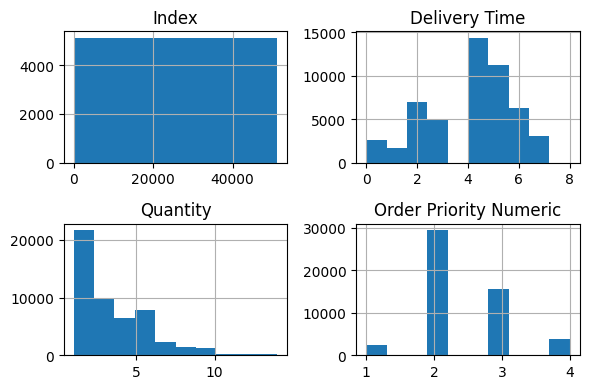

In [22]:
import matplotlib.pyplot as plt

# Filtrar las columnas de tipo int64
columnas_int64 = data.select_dtypes(include='int64').columns
print(columnas_int64)

# # Generar histogramas para columnas int64
# data[columnas_int64].hist(bins=10, figsize=(6, 4))
# plt.tight_layout()
# plt.show()

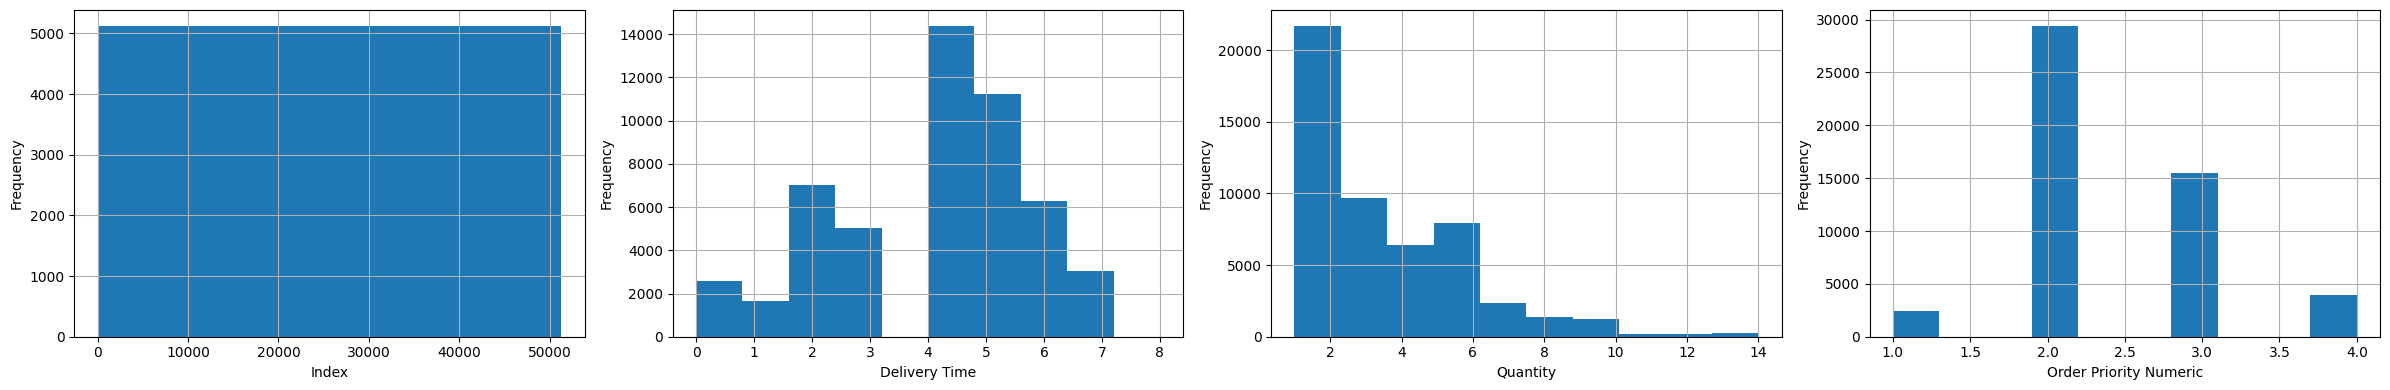

In [23]:
# Generar histogramas para columnas int64
fig, axes = plt.subplots(nrows=1, ncols=len(columnas_int64), figsize=(6*len(columnas_int64), 4))

for i, columna in enumerate(columnas_int64):
    data[columna].hist(bins=10, ax=axes[i])
    axes[i].set_xlabel(columna)  # Título del eje X
    axes[i].set_ylabel('Frequency')  # Título del eje Y

plt.tight_layout()
plt.show()

## Diagrama de dispersion

Sales vs Profit: Muestra la relación entre las ventas y la ganancia, podría ser útil para identificar rentabilidad de las ventas.

Quantity vs Profit: La cantidad de productos vendidos se relaciona con la ganancia, lo que ayuda a entender cómo afecta el volumen de ventas a la rentabilidad.

Sales vs Shipping Cost: Comparar las ventas con el costo de envío brinda información sobre la eficiencia de los costos de envío en relación con las ventas generadas.

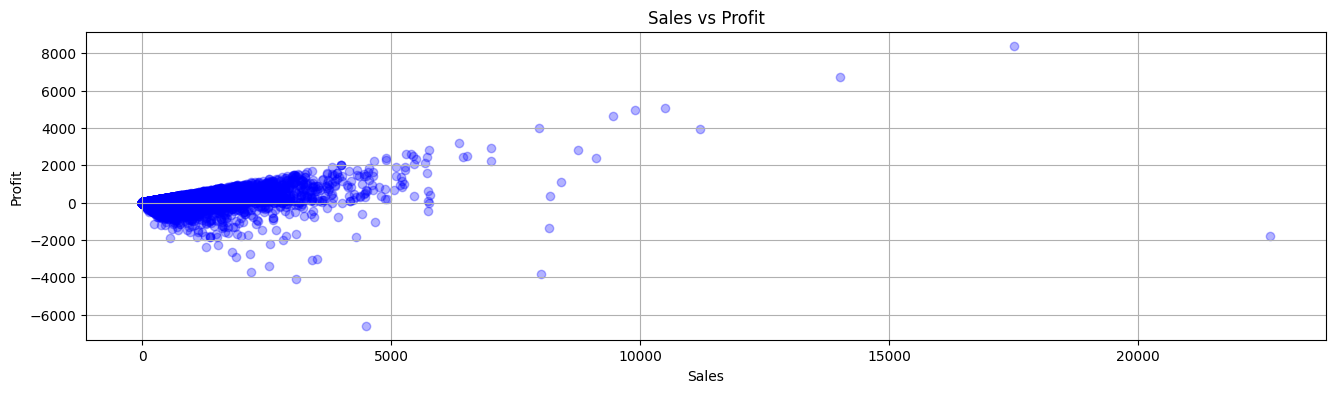

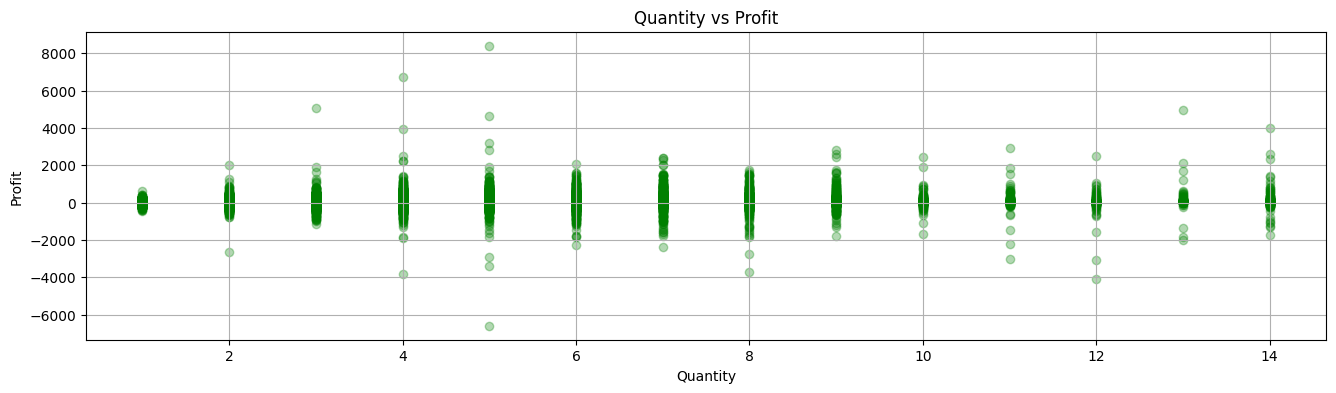

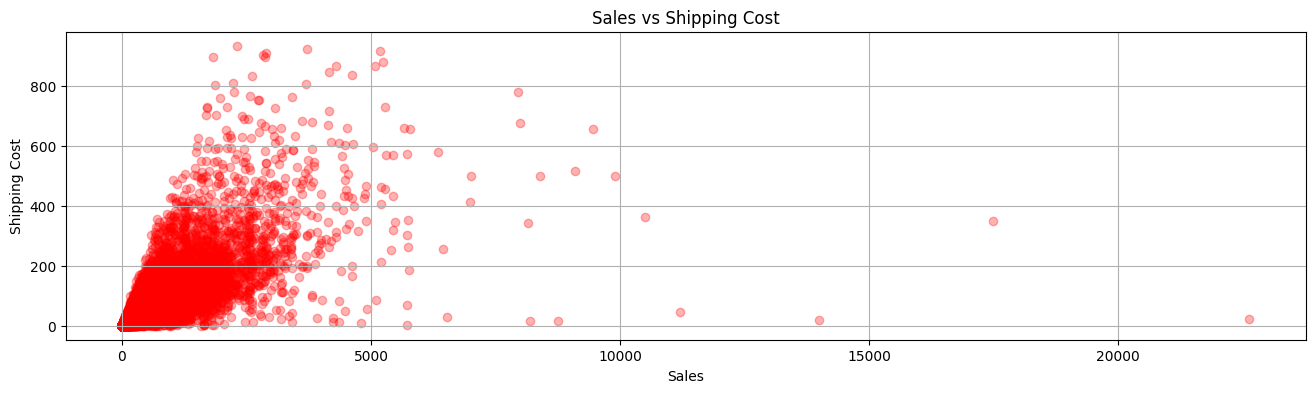

In [36]:
# Diagrama de dispersion 1: Sales vs Profit
plt.figure(figsize=(16,4))
plt.scatter(data['Sales'], data['Profit'], color='blue', alpha=0.3)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Diagrama de dispersion 2: Quantity vs Profit
plt.figure(figsize=(16,4))
plt.scatter(data['Quantity'], data['Profit'], color='green', alpha=0.3)
plt.title('Quantity vs Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Diagrama de dispersion 3: Sales vs Shipping Cost
plt.figure(figsize=(16,4))
plt.scatter(data['Sales'], data['Shipping Cost'], color='red', alpha=0.3)
plt.title('Sales vs Shipping Cost')
plt.xlabel('Sales')
plt.ylabel('Shipping Cost')
plt.grid(True)
plt.show()

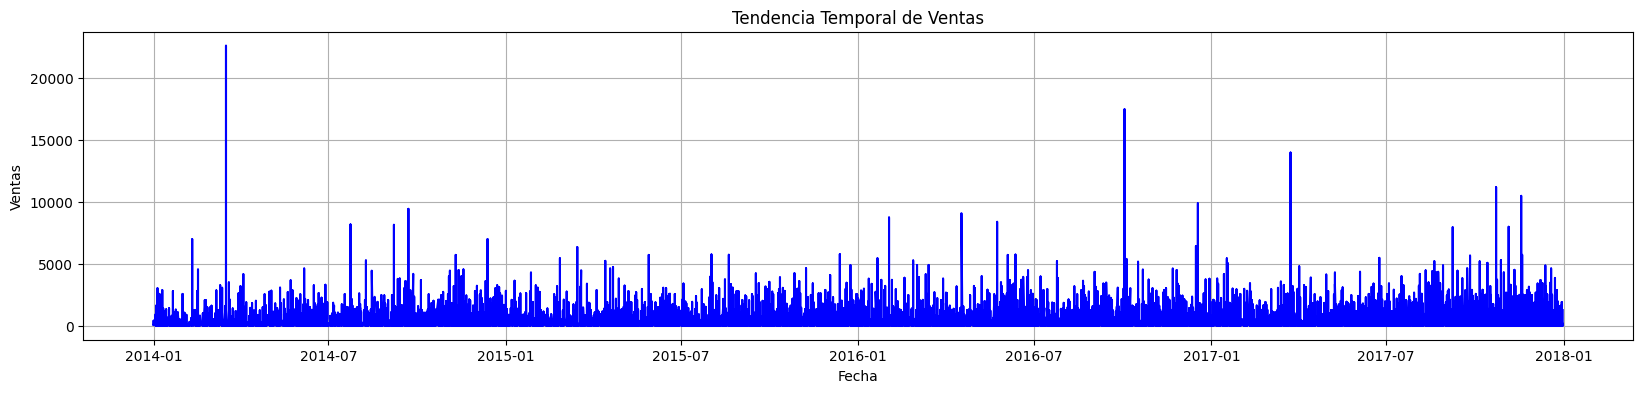

In [66]:
# Graficar la tendencia temporal
plt.figure(figsize=(20, 4))
plt.plot(data["Order Date"], data['Sales'], color='blue')
plt.title('Tendencia Temporal de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

In [41]:
# Selecciona una columna datetime64 para graficar
# columna_fecha = 'Order Date'

# Ordenar los valores por timestamp y resetear el índice
data.sort_values("Order Date", inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()




,Index,Order ID,Order Date,Ship Date,Delivery Time,Ship Mode,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Shipping Category,Order Priority Numeric
0,19088,HU-2014-AT73557-41640,2014-01-01,2014-01-05,4,Second Class,Annie Thurman,Consumer,Budapest,Budapest,...,0.0,29.640,8.17,High,16.530,0.448276,164.580,69.000,High,3
1,1577,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.1,36.036,9.72,Medium,40.122,0.299387,448.008,124.158,High,2
2,1580,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.1,37.770,4.70,Medium,22.734,0.332278,448.008,124.158,Medium,2
3,162,AG-2014-TB112803-41640,2014-01-01,2014-01-06,5,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,...,0.0,106.140,35.46,Medium,204.150,0.259956,408.300,106.140,Very High,2
4,1589,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.1,15.342,1.80,Medium,27.621,0.277723,448.008,124.158,Low,2


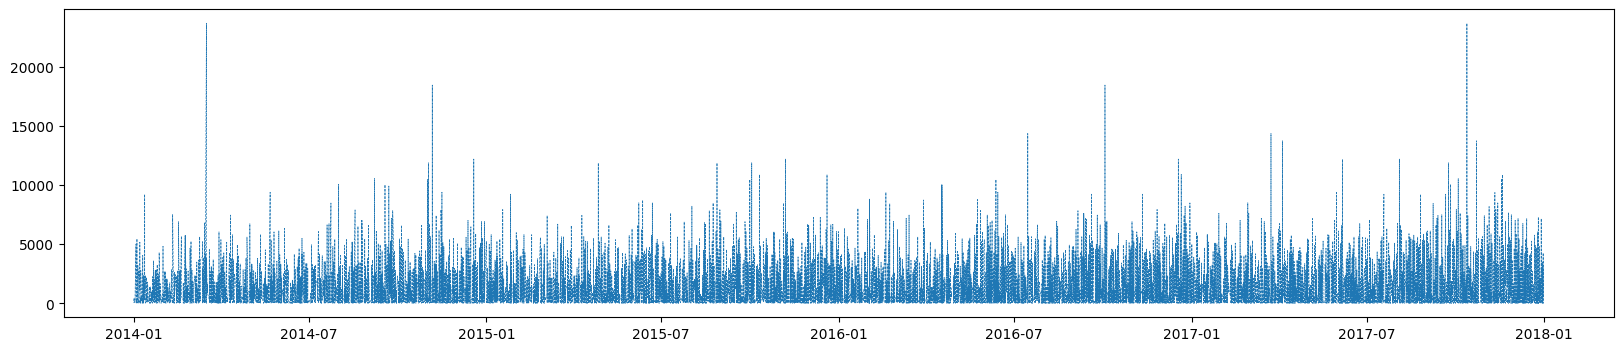

In [47]:
plt.figure(figsize = (20, 4)) # figura con tamaño horizontal en 20 y vertical 4
plt.plot(data["Order Date"], data["Total Sales"],
    linestyle = 'dashed',
    linewidth = 0.5 # Ancho de línea
)
plt.show()

In [51]:
data[data['Order ID'] != 'HU-2014-AT73557-41640IN-2014-JH159857-41640IN-2014-JH159857-41640AG-2014-TB112803-41640IN-2014-JH159857-41640IT-2014-EM14140124-41640CA-2014-MM726023-41641IN-2014-KN164507-41642IN-2014-KN164507-41642ID-2014-KL1664592-41642IZ-2014-LW699061-41642IZ-2014-LW699061-41642ID-2014-KL1664592-41642ID-2014-KL1664592-41642ID-2014-KL1664592-41642IR-2014-JO528060-41642IR-2014-JO528060-41642IR-2014-JO528060-41642IR-2014-NG835560-41642TZ-2014-JG5115129-41642IN-2014-LB16735102-41642IN-2014-LB16735102-41642MX-2014-SV2078551-41642ES-2014-DD13570139-41642IN-2014-LB16735102-41642ID-2014-CM12235130-41642IN-2014-DP1339078-41642MX-2014-AW1093031-41643IT-2014-GT14635139-41643IT-2014-GT14635139-41643ES-2014-AP1091545-41643MX-2014-AW1093031-41643MX-2014-AW1093031-41643SU-2014-JC5340122-41643SU-2014-JC5340122-41643IN-2014-BD1150066-41643CA-2014-DP13000140-41643MX-2014-RA1991518-41643MX-2014-MH1778582-41643MX-2014-MH1778582-41643MX-2014-RA1991518-41643US-2014-BT1130518-41643MX-2014-BT1130531-41643IN-2014-SW20455127-41644ES-2014-MG1789045-41644ES-2014-MG1789045-41644MX-2014-JH1543082-41644CA-2014-PO19195140-41644CA-2014-PO19195140-41644CA-2014-PO19195140-41644ID-2014-RD19660144-41645CA-2014-MB18085140-41645IN-2014-KM1666027-41645IN-2014-BH1171059-41645IN-2014-BH1171059-41645ID-2014-RD19660144-41645AO-2014-GK46204-41645ES-2014-SH2039545-41645']


,Index,Order ID,Order Date,Ship Date,Delivery Time,Ship Mode,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Shipping Category,Order Priority Numeric
0,19088,HU-2014-AT73557-41640,2014-01-01,2014-01-05,4,Second Class,Annie Thurman,Consumer,Budapest,Budapest,...,0.000,29.6400,8.170,High,16.5300,0.448276,164.580,69.0000,High,3
1,1577,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.100,36.0360,9.720,Medium,40.1220,0.299387,448.008,124.1580,High,2
2,1580,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.100,37.7700,4.700,Medium,22.7340,0.332278,448.008,124.1580,Medium,2
3,162,AG-2014-TB112803-41640,2014-01-01,2014-01-06,5,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,...,0.000,106.1400,35.460,Medium,204.1500,0.259956,408.300,106.1400,Very High,2
4,1589,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.100,15.3420,1.800,Medium,27.6210,0.277723,448.008,124.1580,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,25728,MX-2017-TD2099582-43100,2017-12-31,2018-01-06,6,Standard Class,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,0.000,0.5600,1.199,Medium,7.1200,0.078652,476.404,107.9640,Low,2
51286,44366,CA-2017-CC12430140-43100,2017-12-31,2018-01-06,6,Standard Class,Chuck Clark,Home Office,Columbus,Indiana,...,0.000,56.5110,8.320,Medium,104.6500,0.270000,249.580,72.2598,High,2
51287,43053,CA-2017-JM15580140-43100,2017-12-31,2018-01-04,4,Standard Class,Jill Matthias,Consumer,Loveland,Colorado,...,0.200,-0.6048,1.170,Medium,1.0080,-0.200000,179.016,69.5346,Low,2
51288,19154,IN-2017-BS1136558-43100,2017-12-31,2018-01-05,5,Second Class,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,0.000,105.0000,21.840,Medium,69.1500,0.379610,1010.730,372.5700,High,2


In [57]:
data["Order Date"].describe

<bound method NDFrame.describe of 0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
51285   2017-12-31
51286   2017-12-31
51287   2017-12-31
51288   2017-12-31
51289   2017-12-31
Name: Order Date, Length: 51290, dtype: datetime64[ns]>

In [60]:
data.dropna(subset=['Order Date'])

,Index,Order ID,Order Date,Ship Date,Delivery Time,Ship Mode,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Sales per Quantity,Profit Margin,Total Sales,Total Profit,Shipping Category,Order Priority Numeric
0,19088,HU-2014-AT73557-41640,2014-01-01,2014-01-05,4,Second Class,Annie Thurman,Consumer,Budapest,Budapest,...,0.000,29.6400,8.170,High,16.5300,0.448276,164.580,69.0000,High,3
1,1577,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.100,36.0360,9.720,Medium,40.1220,0.299387,448.008,124.1580,High,2
2,1580,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.100,37.7700,4.700,Medium,22.7340,0.332278,448.008,124.1580,Medium,2
3,162,AG-2014-TB112803-41640,2014-01-01,2014-01-06,5,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,...,0.000,106.1400,35.460,Medium,204.1500,0.259956,408.300,106.1400,Very High,2
4,1589,IN-2014-JH159857-41640,2014-01-01,2014-01-08,7,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.100,15.3420,1.800,Medium,27.6210,0.277723,448.008,124.1580,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,25728,MX-2017-TD2099582-43100,2017-12-31,2018-01-06,6,Standard Class,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,0.000,0.5600,1.199,Medium,7.1200,0.078652,476.404,107.9640,Low,2
51286,44366,CA-2017-CC12430140-43100,2017-12-31,2018-01-06,6,Standard Class,Chuck Clark,Home Office,Columbus,Indiana,...,0.000,56.5110,8.320,Medium,104.6500,0.270000,249.580,72.2598,High,2
51287,43053,CA-2017-JM15580140-43100,2017-12-31,2018-01-04,4,Standard Class,Jill Matthias,Consumer,Loveland,Colorado,...,0.200,-0.6048,1.170,Medium,1.0080,-0.200000,179.016,69.5346,Low,2
51288,19154,IN-2017-BS1136558-43100,2017-12-31,2018-01-05,5,Second Class,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,0.000,105.0000,21.840,Medium,69.1500,0.379610,1010.730,372.5700,High,2


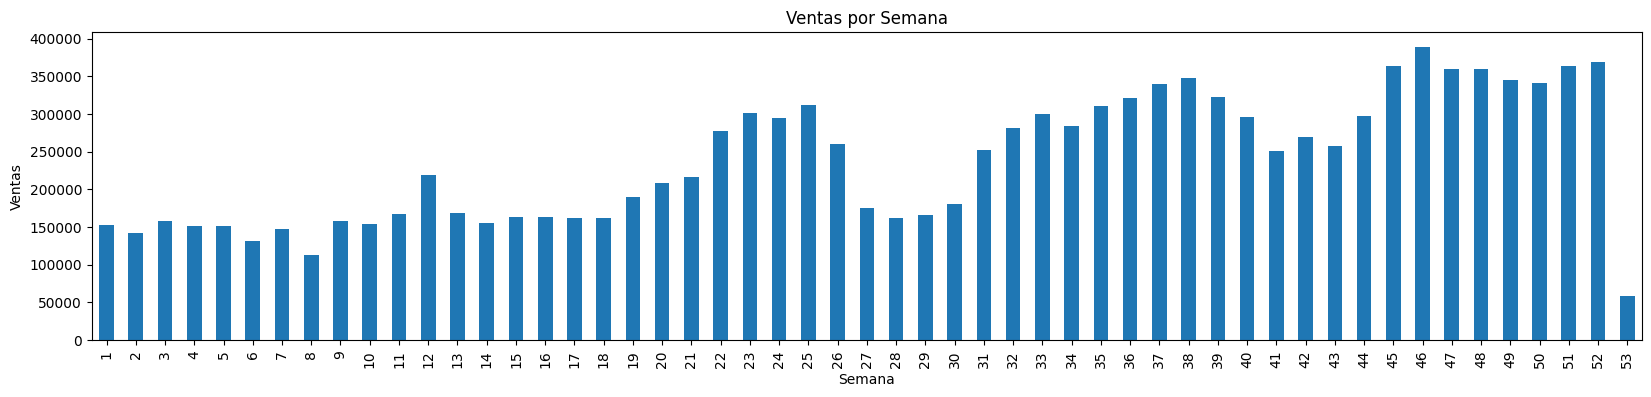

In [65]:
# Agrupa las ventas por semana
data_semanal = data.groupby(data["Order Date"].dt.isocalendar().week)["Sales"].sum()

# Genera el plot
plt.figure(figsize=(20, 4))
data_semanal.plot(kind="bar")
plt.xlabel("Semana")
plt.ylabel("Ventas")
plt.title("Ventas por Semana")
plt.show()


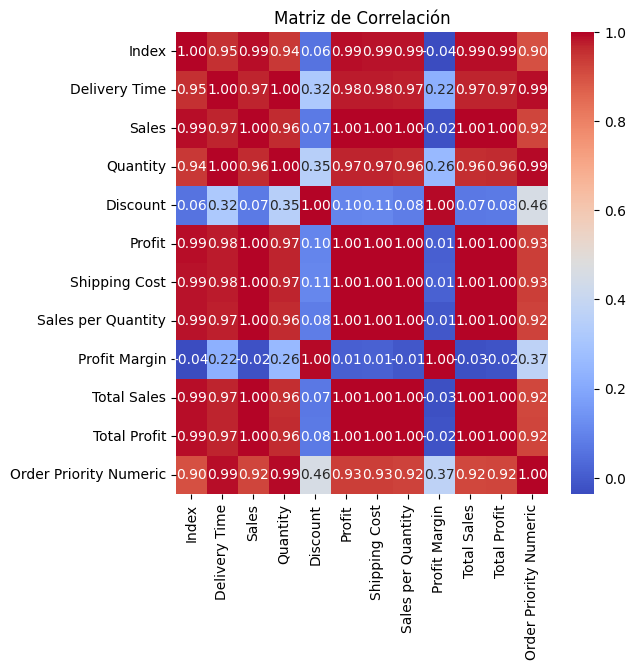

In [72]:
import seaborn as sns

# Calcular la matriz de correlación
matriz_correlacion = medidas_df.corr()
matriz_correlacion
# Configurar el tamaño de la figura
plt.figure(figsize=(6, 6))

# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')

# Configurar el título y las etiquetas
plt.title('Matriz de Correlación')
plt.show()

"Sales" y "Total Sales" (0.96): Fuerte correlación positiva. Sugiere conforme aumentan las ventas de un producto, aumentan las ventas totales.
"Profit" y "Total Profit" (1.0): Correlación perfecta. Indica que las ganancias individuales están directamente relacionadas con las ganancias totales.
"Sales" y "Profit" (0.97): Indica que mayores ventas generalmente llevan a mayores ganancias.
"Quantity" y "Total Sales" (0.97): La cantidad de productos vendidos está fuertemente correlacionada con las ventas totales.

"Discount" y "Profit Margin" (-0.10): No es una correlación fuerte y ademas es negativa. Sugiere que descuentos mayores estan asociados con márgenes de ganancia más bajos.

"Discount" y "Sales" (-0.06): Relación negativa. Indica que mayores descuentos no llevan a un aumento en ventas.

"Profit Margin" y "Sales" (-0.22): Una correlación negativa moderada, sugiriendo que ventas mayores pueden estar asociadas con márgenes de ganancia más bajos.